# Cvičení

## NBA

Stáhni si dataset `nba_logreg.csv`, který informace o začátečnících v basketballové soutěži NBA. Výstupní proměnná je označená jako `TARGET_5Yrs`, která určuje, jestli byl hráč aktivní i po 5 letech.

- Načti si data do proměnných `X` a `y`
- Rozděl data na trénovací a testovací (velikost testovacích dat nastav na 30% a nezapomeň nastavit proměnnou `random_state`, aby tvoje výsledky byly reprodukovatelné)
- Použijeme stejný algoritmus jako v lekci, tj. `KNeighborsClassifier`.
- Vytvoř si matici záměn a na základě poskytnutých čísel zkus vypočítat metriky _Precision_ a _Recall_. Následně si výsledky svého výpočtu ověř s využitím funkcí modulu `scikit-learn`.
- Uvažuj, že jsi v roli pracovníka agentury, která pomáhá nadějným začínajícím hráčům. Pro tebe jako pro pracovníka agentury je velmi důležité nepropásnout nějaký nový talent. Pokud nabídneš spolupráci někomu, kdo pak neuspěje, tolik to nevadí. Zkus najít hodnotu parametru `n_neighbors`, která maximalizuje ideální metriku pro pracovníka agentury. K nalezení optimální metriky použij graf.

Pokud by tě zajímal význam jednotlivých sloupců, pak je níže:

| Zkratka      | Význam                | Překlad                           |
|--------------|-----------------------|-----------------------------------|
| GP           | Games Played          | odehrané hry                      |
| MIN          | Minutes Played        | odehrané minuty                   |
| PTS          | Points Per Game       | body za hru                       |
| FGM          | Field Goals Made      | úspšné střelecké pokusy z pole    |
| FGA          | Field Goals Attempts  | střelba z pole                     |
| FG%          | Field Goals Percent   | úspěšnost střelby z pole           |
| 3P Made      | 3-Points Made         | úspěšné střelecké pokusy z tříbodového území |
| 3PA          | 3-Points Attempts     | střelba z tříbodového území        |
| 3P%          | 3-Point Percent       | úspěšnost střelby z tříbodového území |
| FTM          | Free Throws Made      | vhozené pokutové koše             |
| FTA          | Free Throws Attempts  | trestné hody                       |
| FT%          | Free Throw Percent    | úspěšnost trestných hodů          |
| OREB         | Offensive Rebounds    | útočné doskoky                    |
| DREB         | Defensive Rebounds    | obranné doskoky                   |
| REB          | Rebounds              | odrazy                            |
| AST          | Assists               | asistence                         |
| STL          | Steals                | zisky míče                        |
| TOV          | Turnovers             | ztráta                            |

Zdroje překladů: [Anglicko-český basketballový slovník](https://cbf.cz.basketball/upload/docs/391MGY.pdf)


In [40]:
import pandas
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, precision_score, recall_score, PrecisionRecallDisplay, f1_score, accuracy_score

# Načtení dat
data = pandas.read_csv("data/nba_logreg.csv")

data.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [41]:
# Odstranění sloupce se jmény hráčů - model pracuje pouze s číselnými daty
data = data.drop(columns="Name")

# Pro zajímavost si tentokrát místo prvních 5 řádků (head()) zobrazíme náhodných 5 řádků (sample())
# data.head()
data.sample(5)

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
786,35,19.6,7.3,3.0,6.9,43.8,0.3,0.9,30.0,1.0,1.5,63.0,1.1,2.5,3.6,0.9,0.4,0.5,0.8,1.0
1030,80,22.6,9.3,3.6,8.4,43.1,0.8,2.1,38.2,1.3,1.8,71.7,1.4,1.8,3.2,1.3,0.8,0.3,1.0,1.0
680,81,17.9,5.6,2.0,5.0,39.4,0.6,1.8,31.5,1.1,1.5,77.3,0.9,2.4,3.3,0.7,0.7,0.3,1.3,1.0
266,49,8.3,4.5,1.8,3.9,46.6,0.0,0.1,0.0,0.8,1.2,70.2,0.6,0.7,1.3,0.5,0.3,0.3,0.6,1.0
1105,24,14.3,5.2,1.8,5.0,36.1,1.0,2.6,40.3,0.6,0.7,82.4,0.3,1.6,1.8,1.8,0.5,0.0,0.7,1.0


In [42]:
# Rozdělení dat na vstupní proměnné a cílovou klasifikaci
X = data.drop(columns=["TARGET_5Yrs"])
y = data["TARGET_5Yrs"]

# Rozdělení dat na trénovací a testovací sadu
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Normalizace dat
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
# Výběr klasifikátoru (KNN)
clf = KNeighborsClassifier()

# Natrénování na trénovacích datech
clf.fit(X_train, y_train)

# Predikce z testovacích dat
y_pred = clf.predict(X_test)

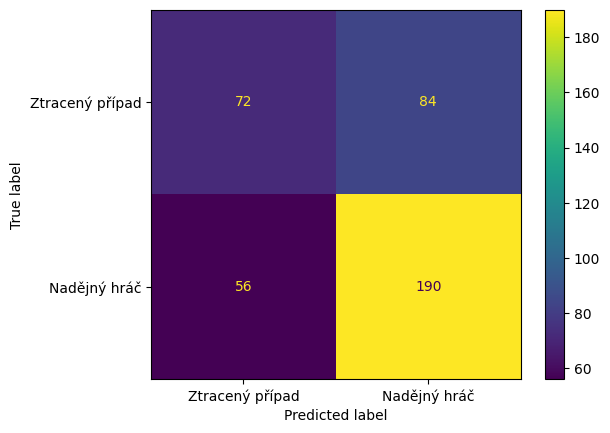

In [44]:
# Zobrazení confusion matrix
cm = ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
    # display_labels=clf.classes_,
    display_labels=["Ztracený případ", "Nadějný hráč"],
)

# Vysvětlení k display_labels=clf.classes_ (bylo v původní verzi řešení):
#   Atribut classes_ objektu clf obsahuje názvy štítků dat - clf je automaticky zjistí ze vstupních dat y_test jakožto unikátní hodnoty.
#   Nicméně metoda ConfusionMatrixDisplay si názvy štítků načítá automaticky, takže volat display_labels=clf.classes_ je nadbytečné.
#   Parametr se ale může hodit k "ručnímu" přejmenování pro účel zobrazení v matici, např. display_labels=["Nadějný hráč", "Ztracený případ"].


# Alternativa: funkce s číselným výstupem matice
# cm = confusion_matrix(y_test, y_pred)
# print(cm)

### Metriky

- Precision:

  $P = \frac{TP}{TP+FP}$

In [45]:
# Výpočet z confusion matrix:
#   190 / (190 + 84)
precision_score(y_test, y_pred)

0.6934306569343066

- Recall:

  $R = \frac{TP}{TP+FN}$

In [46]:
# Výpočet z confusion matrix:
#   190 / (190 + 56)
recall_score(y_test, y_pred)

0.7723577235772358

### Nalezení optimální hodnoty parametru `n_neighbors`

Maximum recall of 0.83 reached when using 19 neighbors.


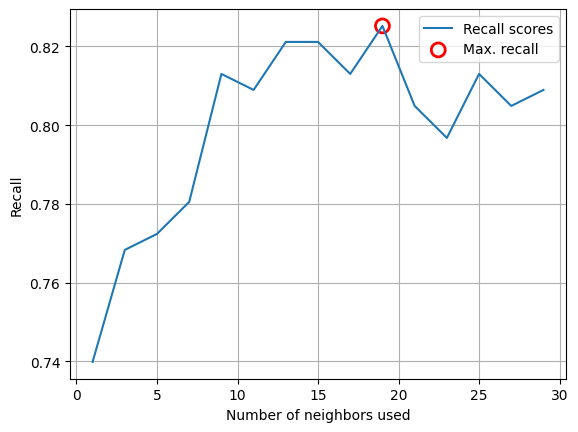

In [47]:
# Nejvhodnější metrika?
# --> Recall (penalizuje označení nadějného hráče za ztracený případ)
from sklearn.metrics import recall_score

# Příprava testovaných hodnot počtu sousedů (k)
# (čísla od 1 do 30 včetně, pouze lichá)
ks = range(1, 31, 2)
recall_scores = []

# Predikce a recall score pro každou testovanou hodnotu
for k in ks:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    recall_scores.append(recall_score(y_test, y_pred))

# Graf
plt.plot(ks, recall_scores, label="Recall scores")
plt.xlabel("Number of neighbors used")
plt.ylabel("Recall")
plt.grid()

# Textový výpis výsledku
max_recall_value = max(recall_scores)
max_recall_index = recall_scores.index(max_recall_value)
k_best = ks[max_recall_index]
print(f"Maximum recall of {max_recall_value:0.2f} reached when using {k_best} neighbors.")

# Označení maxima v grafu
plt.scatter(x=k_best, y=max_recall_value, label="Max. recall", facecolors='none', edgecolors="red", s=100, linewidths=2)
plt.legend()

## Bonus

Vrať se k experimentu z lekce, který se zabýval kvalitou vína. Tentokrát vyber hodnotu parametru `n_neighbors` na základě metriky `precision`.

Nejprve se zamysli nad tím, co by nás k tomu vedlo. Která z těchto možností je správná?

1. Je lepší na základě modelu nekoupit dobré víno, než koupit špatné víno a to pak vyhodit.
1. Je lepší koupit omylem špatné víno a to pak vyhodit, než promeškat nákup dobrého víno.

Na základě grafu vyber tu hodnotu parametru, která dává nejlepší výsledek (nejvyšší hodnotu při volání `precision_score()`). Liší se tvůj zvolený parametr od parametru, který jsme jako závěrečný zvolili v lekci? 

Dále vytvoř graf, který bude pro několik parametrů `n_neighbors` obsahovat všechny čtyři výsledné metriky, které jsme si v kurzu ukázali:
- `accuracy_score`, 
- `precision_score`,
- `recall_score`,
- `f1_score`. 

In [48]:
import pandas
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Načtení dat
data = pandas.read_csv("data/wine.csv")

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [49]:
# Rozdělení dat na vstupní proměnné a cílovou klasifikaci
X = data.drop(columns=["quality"])
y = data["quality"]

# Rozdělení dat na trénovací a testovací sadu
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [50]:
# Normalizace dat
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
# Výběr klasifikátoru a natrénování
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier()

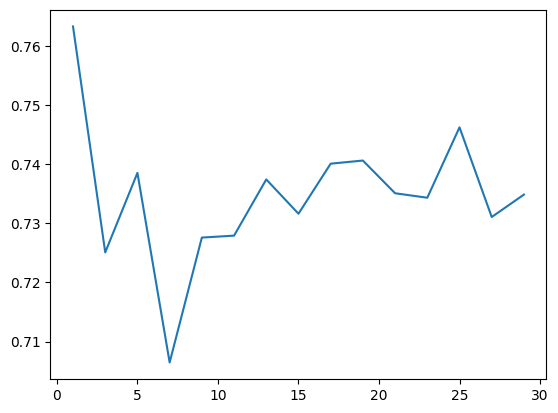

In [52]:
# Výběr optimálního počtu neighbors podle precision
# Penalizuje označení špatného vína za dobré - upřednostníme nekoupit dobré víno, než koupit špatné víno a to pak vyhodit
# Maximalizací precision snížíme pravděpodobnost chybného označení špatného vína za dobré

# Příprava testovaných hodnot počtu sousedů (k)
ks = range(1, 31, 2)
precision_scores = []

# Predikce a recall score pro každou testovanou hodnotu
for k in ks:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    precision_scores.append(precision_score(y_test, y_pred, pos_label="good"))

# Graf
plt.plot(ks, precision_scores)

# Nejlepší precision kupodivu dává k=1, ale i to je možné

Dále vytvoř graf, který bude pro několik parametrů `n_neighbors` obsahovat všechny čtyři výsledné metriky, které jsme si v kurzu ukázali:
- `accuracy_score`, 
- `precision_score`,
- `recall_score`,
- `f1_score`. 

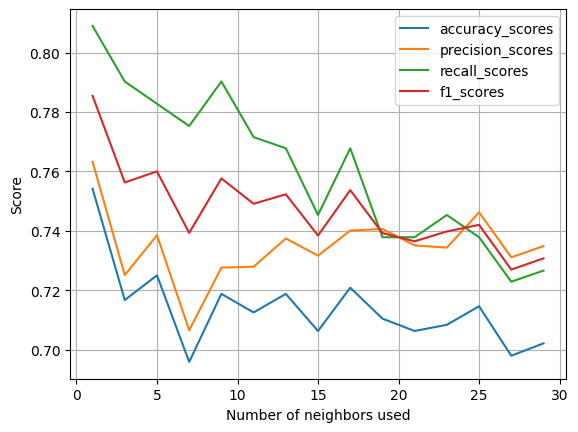

In [53]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for k in ks:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, pos_label="good"))
    recall_scores.append(recall_score(y_test, y_pred, pos_label="good"))
    f1_scores.append(f1_score(y_test, y_pred, pos_label="good"))


plt.plot(ks, accuracy_scores, label="accuracy_scores")
plt.plot(ks, precision_scores, label="precision_scores")
plt.plot(ks, recall_scores, label="recall_scores")
plt.plot(ks, f1_scores, label="f1_scores")

plt.xlabel("Number of neighbors used")
plt.ylabel("Score")
plt.legend()
plt.grid()